In [1]:
from src.IOSystem import IOSystem
from src.SupplyChain import SupplyChain

In [2]:
database = IOSystem(year=2022, language="german").load()

2025-03-30 16:47:01,267 - INFO - Fast database was found - Loading...
2025-03-30 16:47:02,620 - INFO - Database has been loaded successfully in 1.353 seconds.


In [3]:
supplychain = SupplyChain(database=database, select=True)

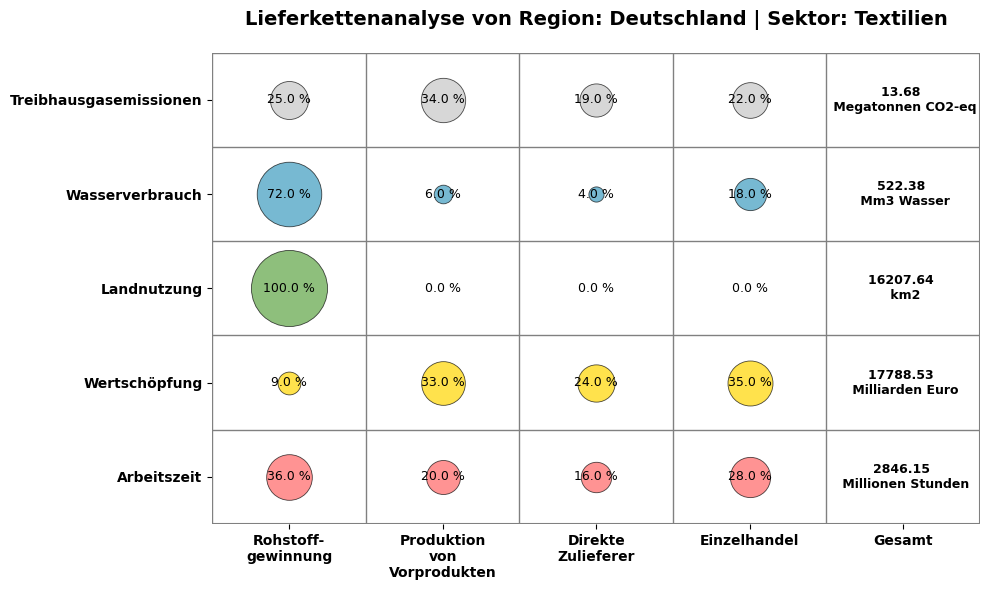

In [4]:
supplychain.plot_supply_chain(impacts=["Treibhausgasemissionen", "Wasserverbrauch", "Landnutzung", "Wertschöpfung", "Arbeitszeit"])

In [5]:
supplychain.calculate_all(impacts=["Treibhausgasemissionen", "Wasserverbrauch", "Landnutzung", "Wertschöpfung", "Arbeitszeit"], relative=False, decimal_places=5)

,Rohstoff-\ngewinnung,Produktion\nvon\nVorprodukten,Direkte\nZulieferer,Einzelhandel,Gesamt,Einheit,Farbe
Treibhausgasemissionen,3.41,4.70,2.61,3.01,13.68,Megatonnen CO2-eq,#c7c7c6
Wasserverbrauch,376.25,30.94,20.66,94.68,522.38,Mm3 Wasser,#3e9cbf
Landnutzung,16207.64,14.11,1.03,0.00,16207.64,km2,#5ea545
Wertschöpfung,1621.61,5861.16,4243.96,6228.83,17788.53,Milliarden Euro,#FFD700
Arbeitszeit,1036.66,577.14,447.33,788.17,2846.15,Millionen Stunden,#ff6666


c:\Users\Jonas\Documents\Hector\Kooperationsphase IO-Modelle\exiobase_explorer\src\SupplyChain.py:443: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([f"{int(tick)}%" for tick in cbar.get_ticks()])


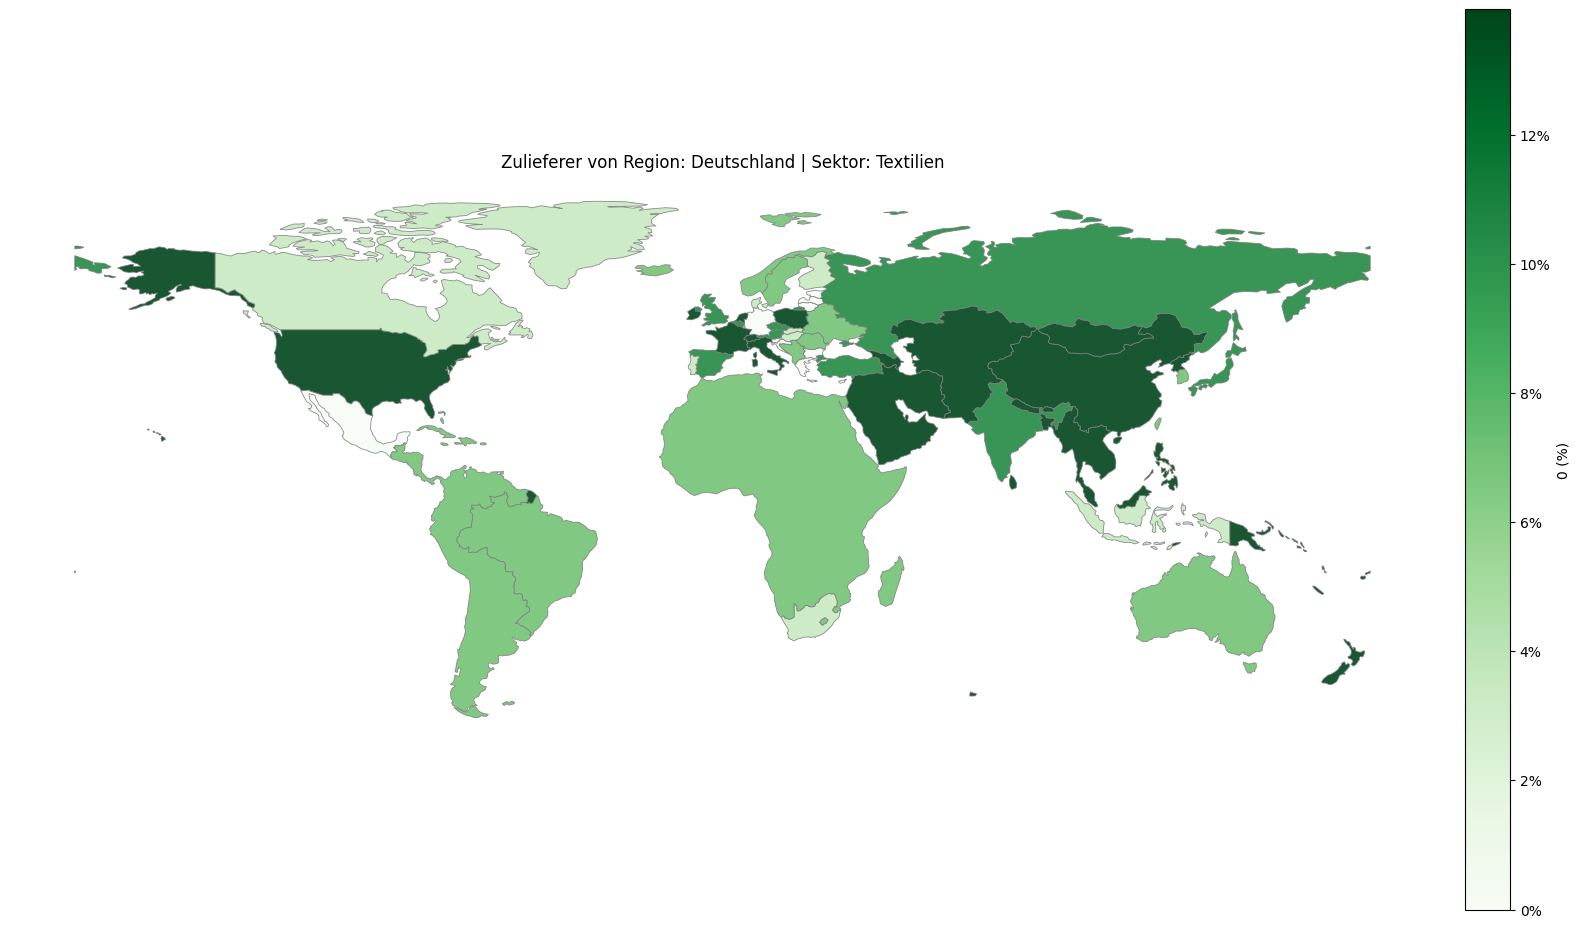

In [6]:
supplychain.plot_subcontractors(color="Greens")